            timestamp   value
0 2014-05-14 01:14:00  85.835
1 2014-05-14 01:19:00  88.167
2 2014-05-14 01:24:00  44.595
3 2014-05-14 01:29:00  56.282
4 2014-05-14 01:34:00  36.534


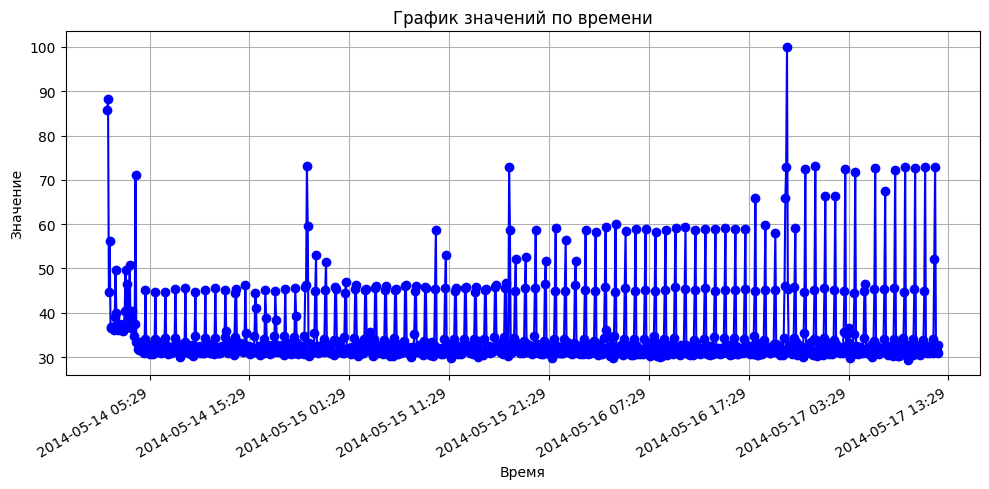

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Загрузка данных из файла (например, только первые 1000 строк)
data = pd.read_csv('/home/vderina/git/diploma/kad/notebooks/NAB/data/realKnownCause/cpu_utilization_asg_misconfiguration.csv', parse_dates=['timestamp'], nrows=1000)

# Проверка данных
print(data.head())

# Создание графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(data['timestamp'], data['value'], marker='o', linestyle='-', color='b')

# Форматирование оси времени
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Устанавливаем интервал между метками (например, каждые 10 минут)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=600))

# Поворот меток на оси времени для лучшей читаемости
plt.gcf().autofmt_xdate()

# Добавление заголовка и меток осей
plt.title('График значений по времени')
plt.xlabel('Время')
plt.ylabel('Значение')

# Отображение графика
plt.grid(True)
plt.tight_layout()
plt.show()

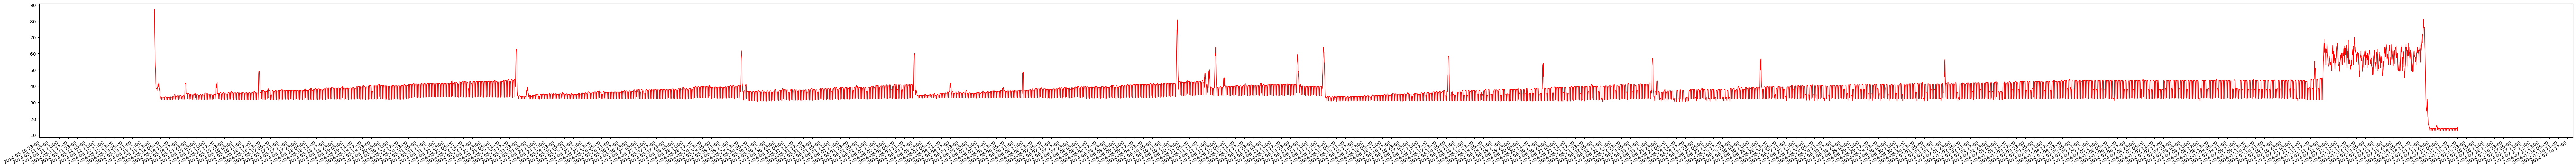

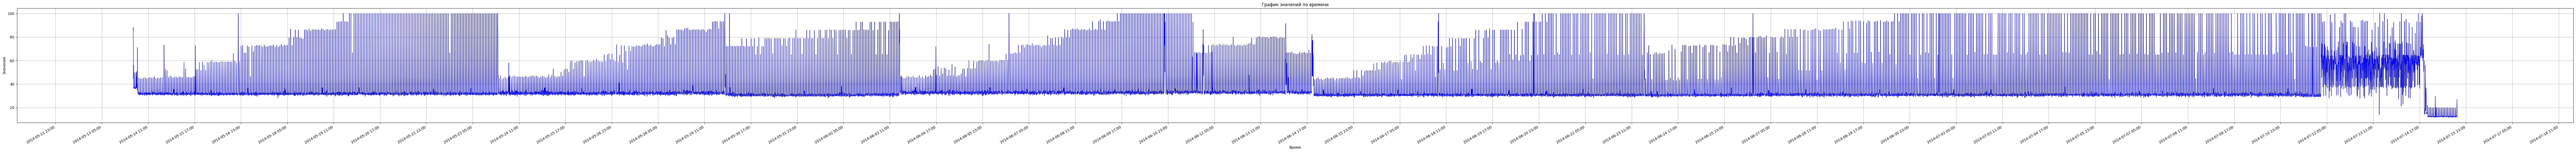

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Загрузка данных из файла
data = pd.read_csv('/home/vderina/git/diploma/kad/notebooks/NAB/data/realKnownCause/cpu_utilization_asg_misconfiguration.csv', parse_dates=['timestamp'])

# Сортировка данных по времени (если они не отсортированы)
data = data.sort_values('timestamp')
plt.figure(figsize=(100, 6))
data['value_smooth'] = data['value'].rolling(window=10, min_periods=1).mean()
plt.plot(data['timestamp'], data['value_smooth'], linestyle='-', color='r', linewidth=1)
# Создание графика
# Форматирование оси времени
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Устанавливаем интервал между метками (например, каждые 2 часа)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))

# Поворот меток на оси времени для лучшей читаемости
plt.gcf().autofmt_xdate()

plt.figure(figsize=(100, 6))

# Построение графика в виде линии
plt.plot(data['timestamp'], data['value'], linestyle='-', color='b', linewidth=1)

# Форматирование оси времени
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Устанавливаем интервал между метками (например, каждые 2 часа)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=30))

# Поворот меток на оси времени для лучшей читаемости
plt.gcf().autofmt_xdate()

# Добавление заголовка и меток осей
plt.title('График значений по времени')
plt.xlabel('Время')
plt.ylabel('Значение')

# Отображение графика
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_405106/3085782111.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


KeyError: -1

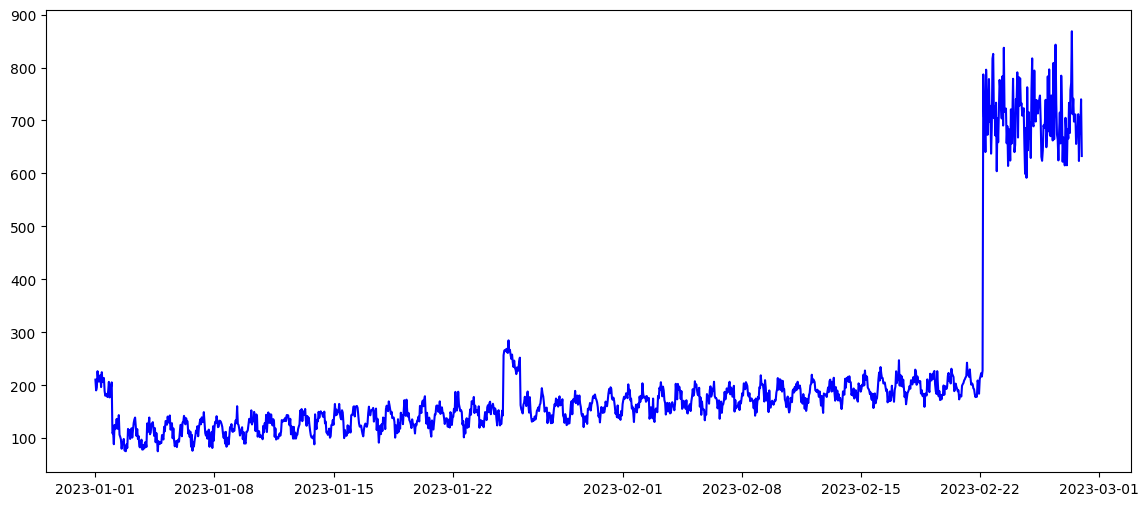

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def generate_api_traffic(start_date, end_date, daily_seasonality=True, holiday_effect=True, yearly_seasonality=True, ddos_attack=True):
    """
    Генерирует временной ряд запросов к API с сезонностью, трендом и аномалиями.
    
    Параметры:
    - start_date: Начальная дата (строка в формате 'YYYY-MM-DD').
    - end_date: Конечная дата (строка в формате 'YYYY-MM-DD').
    - daily_seasonality: Добавить суточную сезонность (по умолчанию True).
    - holiday_effect: Добавить эффект праздников (по умолчанию True).
    - yearly_seasonality: Добавить годовую сезонность (по умолчанию True).
    - ddos_attack: Добавить аномалию (DDoS-атаку) в конце ряда (по умолчанию True).
    
    Возвращает:
    - DataFrame с временным рядом и визуализацию.
    """
    # Создаем временной диапазон
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    n = len(date_range)
    
    # Базовый тренд (линейный рост)
    trend = np.linspace(100, 200, n)
    
    # Сезонность
    seasonality = np.zeros(n)
    
    # Суточная сезонность (пики в 12:00 и 18:00)
    if daily_seasonality:
        hour = date_range.hour
        seasonality += 50 * np.sin(2 * np.pi * hour / 24) + 30 * np.sin(2 * np.pi * (hour - 12) / 24)
    
    # Годовая сезонность (пик летом)
    if yearly_seasonality:
        day_of_year = date_range.dayofyear
        seasonality += 20 * np.sin(2 * np.pi * day_of_year / 365)
    
    # Эффект праздников (увеличение трафика)
    if holiday_effect:
        holidays = [datetime.strptime(f"{date_range[0].year}-01-25", '%Y-%m-%d'),  # Рождество
                    datetime.strptime(f"{date_range[0].year}-01-01", '%Y-%m-%d')]  # Новый год
        for holiday in holidays:
            mask = (date_range >= holiday) & (date_range < holiday + timedelta(days=1))
            seasonality[mask] += 100
    
    # Аномалия (DDoS-атака в конце ряда)
    if ddos_attack:
        attack_start = int(n * 0.9)  # Атака начинается на последних 10% данных
        seasonality[attack_start:] += np.random.normal(500, 50, size=n - attack_start)
    
    # Итоговый временной ряд
    traffic = trend + seasonality + np.random.normal(0, 10, size=n)  # Добавляем шум
    
    # Создаем DataFrame
    df = pd.DataFrame({'timestamp': date_range, 'traffic': traffic})
    
    # Визуализация
    plt.figure(figsize=(14, 6))
    plt.plot(df['timestamp'], df['traffic'], label='Запросы к API', color='blue')
    
    if ddos_attack:
        plt.axvspan(df['timestamp'][attack_start], df['timestamp'][-1], color='red', alpha=0.3, label='DDoS-атака')
    
    plt.title('Запросы к API с сезонностью, трендом и аномалиями')
    plt.xlabel('Время')
    plt.ylabel('Количество запросов')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df

# Пример использования
start_date = '2023-01-01'
end_date = '2023-02-28'
df = generate_api_traffic(start_date, end_date)